In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
import datetime
from scipy.stats import norm, skew
from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline



from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV



# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to see model hyperparameters
from sklearn import set_config
set_config(print_changed_only = False)

# to show all columns
pd.set_option('display.max_columns', None)

In [2]:
df  = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df["car_brand_name"] = df["name"].str.extract('([^\s]+)')
df["car_brand_name"] = df["car_brand_name"].astype("category")

In [5]:
df.drop(["name"], axis = 1, inplace = True)

In [6]:
df.head().style.background_gradient(cmap = "summer")

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [7]:
# check whether there are null values in the dataset
df.isnull().sum()

year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
car_brand_name    0
dtype: int64

In [8]:
df.describe().style.background_gradient(cmap = "viridis")

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,504127.311751,66215.777419
std,4.215344,578548.736139,46644.102194
min,1992.000000,20000.000000,1.000000
25%,2011.000000,208749.750000,35000.000000
50%,2014.000000,350000.000000,60000.000000
75%,2016.000000,600000.000000,90000.000000
max,2020.000000,8900000.000000,806599.000000


In [9]:
df.describe(include = "category").T

,count,unique,top,freq
car_brand_name,4340,29,Maruti,1280


In [10]:
#get class frequencies of some variables

print("Class frequencies of 'transmission' variable: \n\n", df["transmission"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'seller_type' variable: \n\n", df["seller_type"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'owner' variable: \n\n", df["owner"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'car_brand_name' variable: \n\n", df["car_brand_name"].value_counts())

Class frequencies of 'transmission' variable: 

 Manual       3892
Automatic     448
Name: transmission, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'seller_type' variable: 

 Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'owner' variable: 

 First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'car_brand_name' variable: 

 Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswa

In [11]:
df['transmission'].value_counts().to_dict()
df['seller_type'].value_counts().to_dict()
df['owner'].value_counts().to_dict()
df['fuel'].value_counts().to_dict()

{'Diesel': 2153, 'Petrol': 2123, 'CNG': 40, 'LPG': 23, 'Electric': 1}

In [12]:
df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 0}).astype('int')
df['seller_type'] = df['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}).astype('int')
df['owner'] = df['owner'].replace({'First Owner': 1,'Second Owner': 2,'Third Owner': 3,
 'Fourth & Above Owner': 4,
 'Test Drive Car': 0}).astype('int')
df['fuel']=df['fuel'].replace({'Diesel': 1, 'Petrol': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5}).astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            4340 non-null   int64   
 1   selling_price   4340 non-null   int64   
 2   km_driven       4340 non-null   int64   
 3   fuel            4340 non-null   int32   
 4   seller_type     4340 non-null   int32   
 5   transmission    4340 non-null   int32   
 6   owner           4340 non-null   int32   
 7   car_brand_name  4340 non-null   category
dtypes: category(1), int32(4), int64(3)
memory usage: 175.2 KB


<AxesSubplot:>

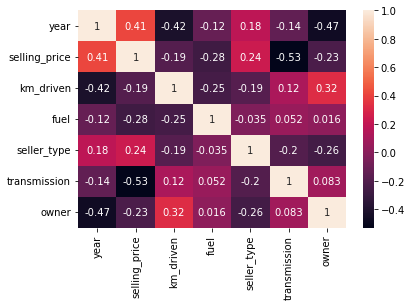

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,2007,60000,70000,2,0,1,1,Maruti
1,2007,135000,50000,2,0,1,1,Maruti
2,2012,600000,100000,1,0,1,1,Hyundai
3,2017,250000,46000,2,0,1,1,Datsun
4,2014,450000,141000,1,0,1,2,Honda


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

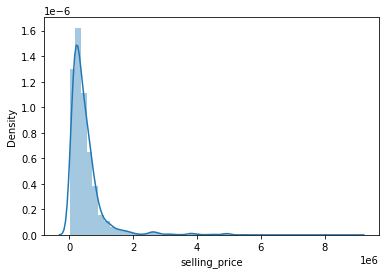

In [16]:
sns.distplot(df["selling_price"])

In [17]:
print("Skewness of target variable: ", df["selling_price"].skew())
print("Kurtosis of target variable: ", df["selling_price"].kurt())

Skewness of target variable:  4.892021472306356
Kurtosis of target variable:  37.08754263212727


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

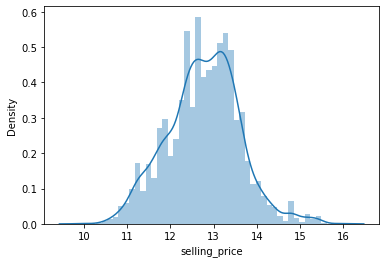

In [18]:
sns.distplot(np.log(df["selling_price"]))

In [19]:
# get skewness of other numeric variables

numeric_data = [column for column in df.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of", col, "variable is:", df[col].skew())

Skewness of year variable is: -0.8332399429174567
Skewness of selling_price variable is: 4.892021472306356
Skewness of km_driven variable is: 2.6690569869843133
Skewness of fuel variable is: 0.6060992827051294
Skewness of seller_type variable is: 1.5628409172591309
Skewness of transmission variable is: -2.609082802082893
Skewness of owner variable is: 1.5121472495085855


In [20]:
# select dependent variable (label)
y = df["selling_price"]
y = np.log1p(y)

In [21]:
# select independent variable (estimator)
x = df.drop("selling_price", axis = 1)

#encode the variables of the dataset
x = pd.get_dummies(x, drop_first = True)

In [22]:
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,car_brand_name_Audi,car_brand_name_BMW,car_brand_name_Chevrolet,car_brand_name_Daewoo,car_brand_name_Datsun,car_brand_name_Fiat,car_brand_name_Force,car_brand_name_Ford,car_brand_name_Honda,car_brand_name_Hyundai,car_brand_name_Isuzu,car_brand_name_Jaguar,car_brand_name_Jeep,car_brand_name_Kia,car_brand_name_Land,car_brand_name_MG,car_brand_name_Mahindra,car_brand_name_Maruti,car_brand_name_Mercedes-Benz,car_brand_name_Mitsubishi,car_brand_name_Nissan,car_brand_name_OpelCorsa,car_brand_name_Renault,car_brand_name_Skoda,car_brand_name_Tata,car_brand_name_Toyota,car_brand_name_Volkswagen,car_brand_name_Volvo
0,2007,70000,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2007,50000,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2012,100000,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,46000,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,141000,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)

(3472, 34)
(868, 34)


In [24]:
# rob_scaler = RobustScaler()
# rob_scaler.fit(x_train)
# x_train = rob_scaler.transform(x_train)
# x_test = rob_scaler.transform(x_test)

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [26]:
# Training data Evaluation
y_train_pred = lr.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print('mean_squared_error :',mse)

rmse = np.sqrt(mse)
print('Root_mean_squared_error :',rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print('mean_absolute_error :',mae)

r = r2_score(y_train,y_train_pred)
print('r2_score :',r)

mean_squared_error : 0.14797300831296045
Root_mean_squared_error : 0.3846725988590303
mean_absolute_error : 0.3037724408718079
r2_score : 0.7901135245481781


In [27]:
# Testing data Evaluation
y_test_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print('mean_squared_error :',mse)

rmse = np.sqrt(mse)
print('Root_mean_squared_error :',rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print('mean_absolute_error :',mae)

r2 = r2_score(y_test, y_test_pred)
print('R-Squared:', r2)

mean_squared_error : 0.15101502274231837
Root_mean_squared_error : 0.3886065140245572
mean_absolute_error : 0.303874783215817
R-Squared: 0.7845347915244256


In [28]:
import pickle
with open('car_price_predction Model.pkl','wb')as f:
    pickle.dump(lr,f)

In [29]:
len(x.columns)

34

In [30]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_brand_name'],
      dtype='object')

In [31]:
df['car_brand_name'].nunique()

29

In [32]:
x_train.head().T

,3294,2290,874,1907,3244
year,2018,2008,2017,2015,2013
km_driven,50000,70000,50000,92198,3240
fuel,1,2,2,2,2
seller_type,0,0,0,1,0
transmission,0,0,1,1,1
owner,1,1,1,2,2
car_brand_name_Audi,0,0,0,0,0
car_brand_name_BMW,0,0,0,0,0
car_brand_name_Chevrolet,0,0,0,0,0
car_brand_name_Daewoo,0,0,0,0,0


In [33]:
test_array = np.zeros(len(x_train.columns))

In [34]:
len(test_array)

34

In [35]:
a= lr.predict([[2014, 4000, 1, 0., 1, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
np.expm1(a)

array([570246.97796045])